DTLZ6

In [47]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [48]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many.dtlz import DTLZ3
from pymoo.problems.many.dtlz import DTLZ4
from pymoo.problems.many.dtlz import DTLZ6
from pymoo.visualization.scatter import Scatter
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV


#### DTLZ6

In [49]:
# Hypervolume of pareto front of problem for n_vars = 2,3,5,10
problem_5 = DTLZ6(n_var=5)
original_pareto_front_2 = problem_5.pareto_front()
objective_nvar2_1 = [i[0] for i in original_pareto_front_2]
objective_nvar2_2 = [i[1] for i in original_pareto_front_2]
objective_nvar2_3 = [i[2] for i in original_pareto_front_2]
ref_vector_2 = [max(objective_nvar2_1),max(objective_nvar2_2),max(objective_nvar2_3)]
ind = HV(ref_point=ref_vector_2)
Hypervolume_nvar5 = ind(original_pareto_front_2)


problem_7 = DTLZ6(n_var=7)
original_pareto_front_3 = problem_7.pareto_front()
objective_nvar3_1 = [i[0] for i in original_pareto_front_3]
objective_nvar3_2 = [i[1] for i in original_pareto_front_3]
objective_nvar3_3 = [i[2] for i in original_pareto_front_3]
ref_vector_3 = [max(objective_nvar3_1),max(objective_nvar3_2),max(objective_nvar3_3)]
ind = HV(ref_point=ref_vector_3)
Hypervolume_nvar7 = ind(original_pareto_front_3)


problem_10 = DTLZ6(n_var=10)
original_pareto_front_5 = problem_10.pareto_front()
objective_nvar5_1 = [i[0] for i in original_pareto_front_5]
objective_nvar5_2 = [i[1] for i in original_pareto_front_5]
objective_nvar5_3 = [i[2] for i in original_pareto_front_5]
ref_vector_5 = [max(objective_nvar5_1),max(objective_nvar5_2),max(objective_nvar5_3)]
ind = HV(ref_point=ref_vector_5)
Hypervolume_nvar10 = ind(original_pareto_front_5)



In [32]:
Hypervolume_nvar10

0.04664463131074274

### SPEA2 nvars = 10 n_obj =3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     68 |  7.0945910449 |  8.8550784298 |  0.000000E+00 |  7.2294127925 |  6.5952630084
     2 |      200 |    100 |  7.0945910449 |  9.0161843517 |  0.000000E+00 |  7.2232290898 |  6.5905165358
     3 |      300 |    100 |  6.9445895970 |  8.9475693346 |  0.000000E+00 |  7.1502672335 |  6.4521863805
     4 |      400 |    100 |  6.9445895970 |  8.9419154033 |  0.000000E+00 |  7.0866271517 |  6.4521863805
     5 |      500 |    100 |  6.8171219645 |  8.9169911549 |  0.000000E+00 |  7.0270707752 |  6.3309105961
     6 |      600 |    100 |  6.8181911892 |  8.7507085421 |  0.000000E+00 |  6.9202314557 |  6.0472701498
     7 |      700 |    100 |  6.7157030895 |  8.6473096927 |  0.000000E+00 |  6.8093895658 |  6.0472701498
     8 |      800 |    100 |  6.5572180324 |  8.5789976916 |  0.000000E+00 |  6.6626818945 |  5.9296147973
     9 |      900 |    100 |  6.62741

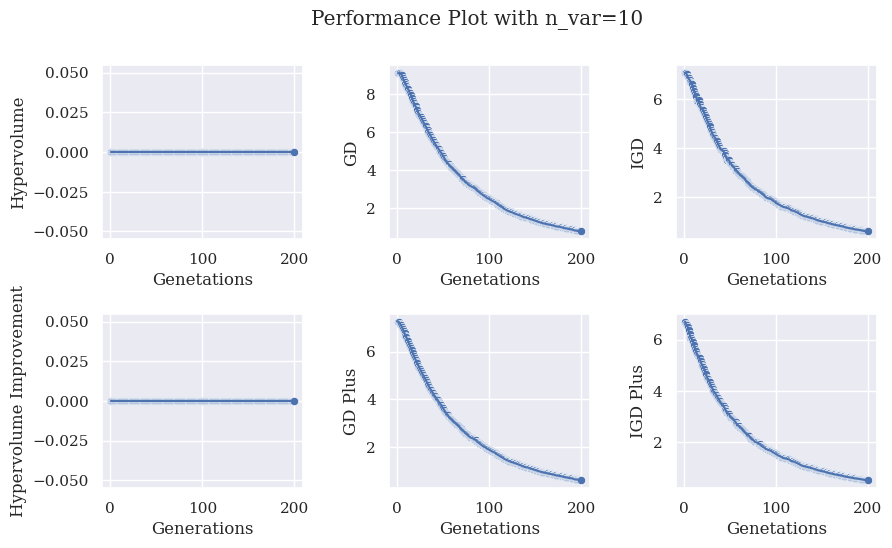

Max values of Hypervolume is 0.0 
 , Best value of GD is 0.7822030124761672 
 , Best value of IGD is 
 0.5908266399044886 Best value of GD+ is 0.6041855781711547 , Best value of IGD+ is 0.499088768219799


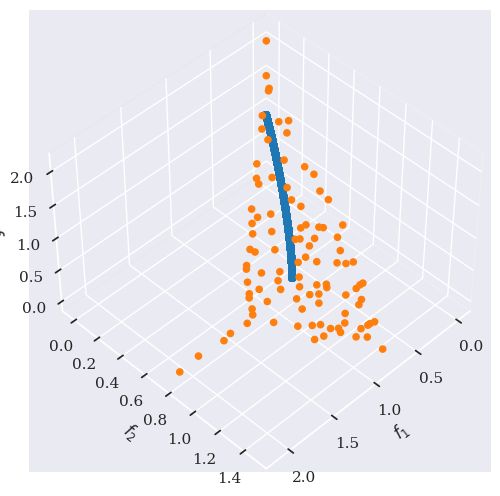

In [50]:
model_list = []
problem = DTLZ6(n_var =10)
algorithm = SPEA2(pop_size=100)
np.random.seed(70)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
plot = Scatter()
plot.add(original_pareto_front)
plot.add(model_list[0].F)
plot.show()
#plt.show()

#### SPEA2 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     78 |  4.6619747071 |  5.7542488651 |  0.000000E+00 |  4.5675912858 |  4.2672719090
     2 |      200 |    100 |  4.6619747071 |  5.7250285370 |  0.000000E+00 |  4.5322424999 |  4.1604443703
     3 |      300 |    100 |  4.6345129711 |  5.6728733793 |  0.000000E+00 |  4.4777464097 |  4.1128111836
     4 |      400 |    100 |  4.6128925080 |  5.6196219688 |  0.000000E+00 |  4.4262248755 |  4.1058798769
     5 |      500 |    100 |  4.3837829351 |  5.6020184953 |  0.000000E+00 |  4.3542757310 |  3.8844909898
     6 |      600 |    100 |  4.3837829351 |  5.4874695630 |  0.000000E+00 |  4.2966621913 |  3.7726539569
     7 |      700 |    100 |  4.2811032526 |  5.3851170426 |  0.000000E+00 |  4.2393582925 |  3.5584177428
     8 |      800 |    100 |  4.1075301410 |  5.2963664373 |  0.000000E+00 |  4.1733122551 |  3.3949569756
     9 |      900 |     85 |  3.73512

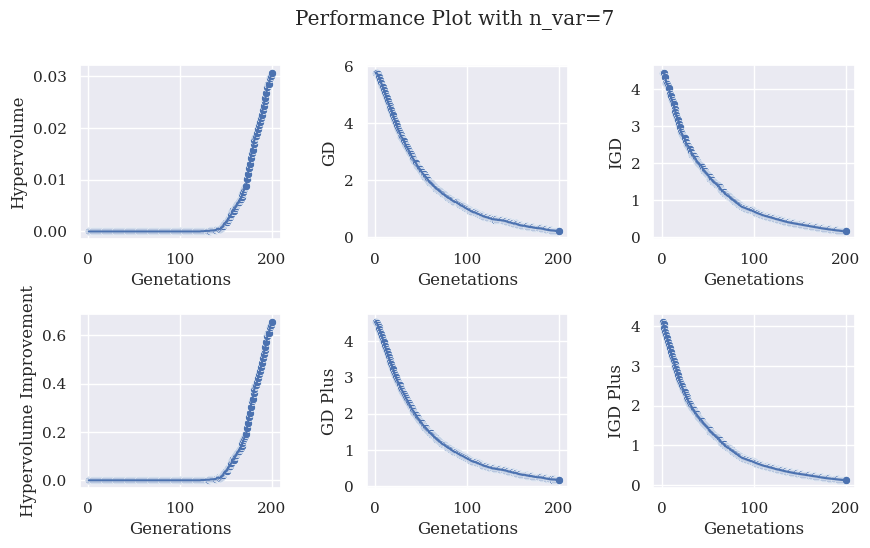

Max values of Hypervolume is 0.030664317110631834 
 , Best value of GD is 0.19939839954651878 
 , Best value of IGD is 
 0.14327028854780785 Best value of GD+ is 0.15620879578704097 , Best value of IGD+ is 0.11737145165304885


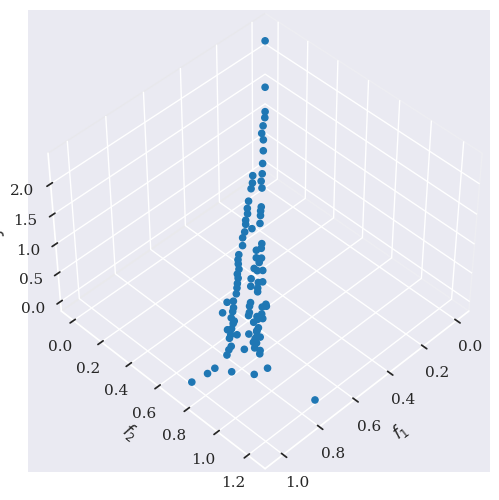

In [34]:
model_list = []
problem = DTLZ6(n_var =7)
algorithm = SPEA2(pop_size=100)
np.random.seed(11)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### SPEA2 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     66 |  2.7875210935 |  3.2890371751 |  0.000000E+00 |  2.6918251985 |  2.4821879808
     2 |      200 |     84 |  2.5870329641 |  3.3016592117 |  0.000000E+00 |  2.6531061554 |  2.2208234409
     3 |      300 |     86 |  2.3422867886 |  3.2861223212 |  0.000000E+00 |  2.6161867105 |  2.0294452594
     4 |      400 |     83 |  2.1965774989 |  3.2949065625 |  0.000000E+00 |  2.5685671776 |  1.9681479178
     5 |      500 |    100 |  2.1965207841 |  3.2766774909 |  0.000000E+00 |  2.5223830213 |  1.9296439350
     6 |      600 |    100 |  2.1849781091 |  3.2480206664 |  0.000000E+00 |  2.4590686116 |  1.9040351971
     7 |      700 |     98 |  2.1616370003 |  3.1449871206 |  0.000000E+00 |  2.4038289975 |  1.8893344766
     8 |      800 |    100 |  2.1174771786 |  3.0560952874 |  0.000000E+00 |  2.3114426511 |  1.7978647951
     9 |      900 |    100 |  2.11695

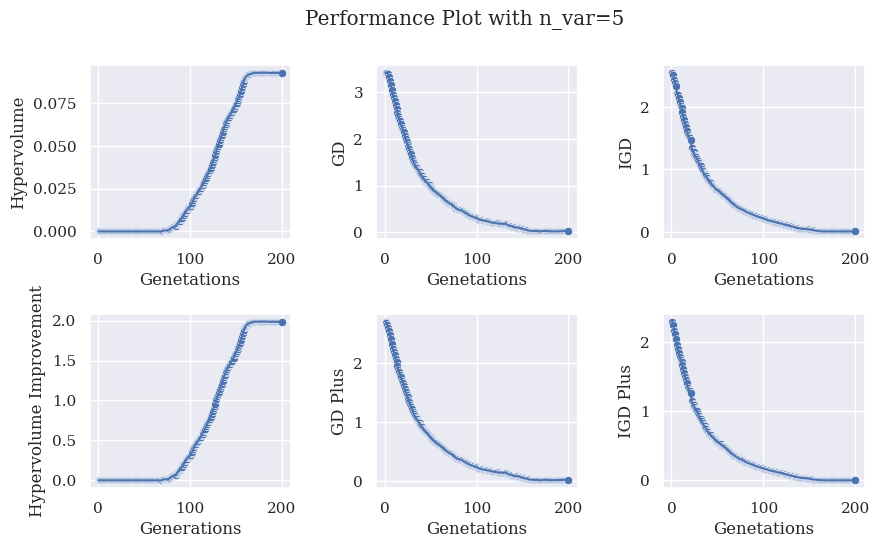

Max values of Hypervolume is 0.09273125629350379 
 , Best value of GD is 0.01571106638929802 
 , Best value of IGD is 
 0.005883345022066144 Best value of GD+ is 0.010559817872878071 , Best value of IGD+ is 0.002332594756876927


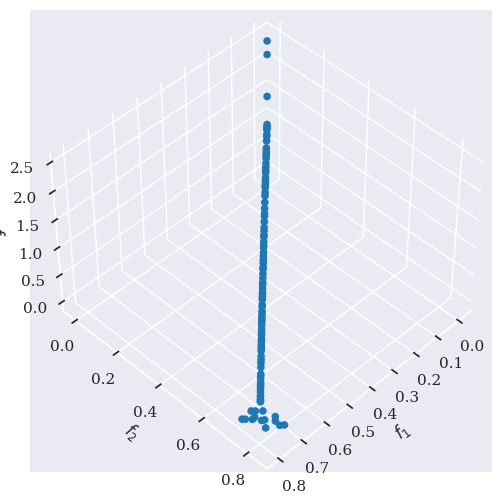

In [35]:
model_list = []
problem = DTLZ6(n_var =5)
algorithm = SPEA2(pop_size=100)
np.random.seed(12)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     63 |  2.7914953955 |  3.3752817624 |  0.000000E+00 |  2.7321023298 |  2.5218922072
     2 |      200 |     92 |  2.7886719353 |  3.3971482952 |  0.000000E+00 |  2.7251027710 |  2.4960736482
     3 |      300 |    100 |  2.7804366047 |  3.4014550769 |  0.000000E+00 |  2.7153311857 |  2.4933463323
     4 |      400 |    100 |  2.7690785591 |  3.3888425007 |  0.000000E+00 |  2.6846757316 |  2.3964044026
     5 |      500 |    100 |  2.6499300016 |  3.3468952911 |  0.000000E+00 |  2.6474175425 |  2.3035119459
     6 |      600 |    100 |  2.6213245542 |  3.2993648223 |  0.000000E+00 |  2.6034030957 |  2.2888916237
     7 |      700 |    100 |  2.5552530898 |  3.3099428735 |  0.000000E+00 |  2.5844150038 |  2.2490581982
     8 |      800 |    100 |  2.4458551832 |  3.3315653900 |  0.000000E+00 |  2.5492330217 |  2.2341299654
     9 |      900 |    100 |  2.42933

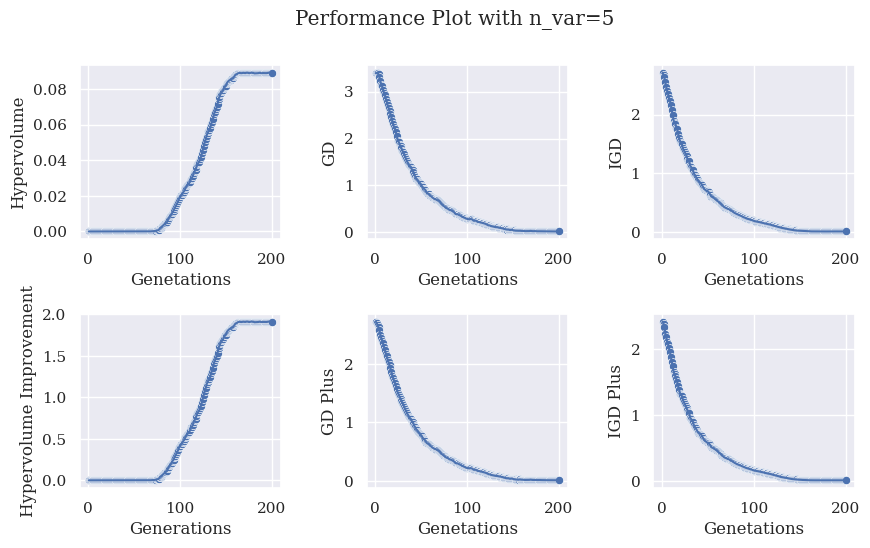

Max values of Hypervolume is 0.0892314406512077 
 , Best value of GD is 0.01526505924459696 
 , Best value of IGD is 
 0.01089812035095276 Best value of GD+ is 0.01108193259057288 , Best value of IGD+ is 0.0068363093615794015


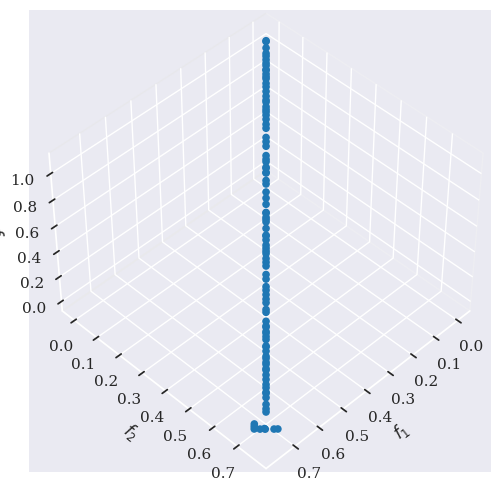

In [52]:
model_list = []
problem = DTLZ6(n_var =5)
algorithm = NSGA2(pop_size=100)
np.random.seed(63)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     61 |  4.4991360074 |  5.8390940884 |  0.000000E+00 |  4.5466328479 |  4.0831277688
     2 |      200 |     88 |  4.3620907533 |  5.8354217856 |  0.000000E+00 |  4.5350616610 |  4.0514947918
     3 |      300 |    100 |  4.1417707161 |  5.8265430469 |  0.000000E+00 |  4.5039121205 |  3.9012602050
     4 |      400 |    100 |  4.1413640079 |  5.7479952477 |  0.000000E+00 |  4.4546080285 |  3.9009112466
     5 |      500 |    100 |  3.9471610433 |  5.6267242229 |  0.000000E+00 |  4.3838866805 |  3.7288959648
     6 |      600 |    100 |  3.9471610433 |  5.5195199869 |  0.000000E+00 |  4.3219609222 |  3.7229422198
     7 |      700 |    100 |  3.9471610433 |  5.3549274013 |  0.000000E+00 |  4.2200891197 |  3.6574207243
     8 |      800 |    100 |  3.9471610433 |  5.3021151072 |  0.000000E+00 |  4.1394427755 |  3.6568236636
     9 |      900 |    100 |  3.90819

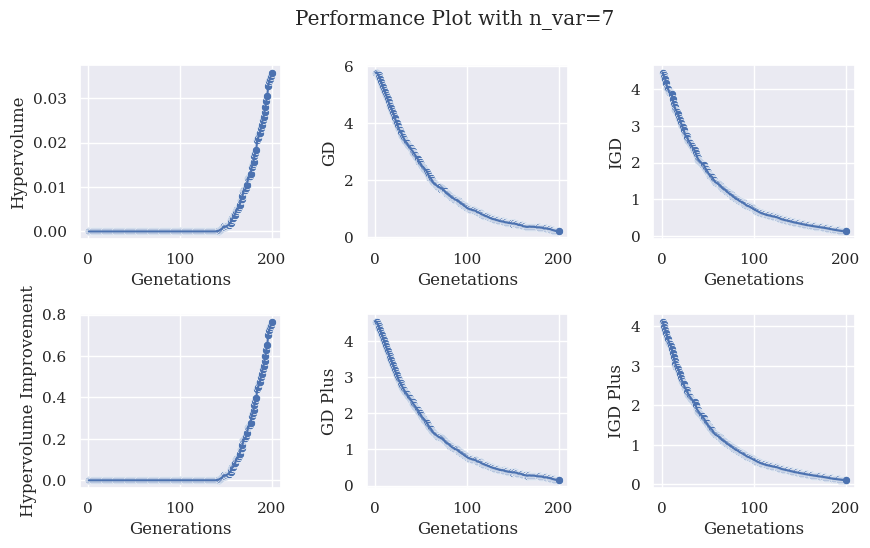

Max values of Hypervolume is 0.0357395416749106 
 , Best value of GD is 0.1873118142815186 
 , Best value of IGD is 
 0.12500782562946502 Best value of GD+ is 0.14764377809499343 , Best value of IGD+ is 0.10056203307090819


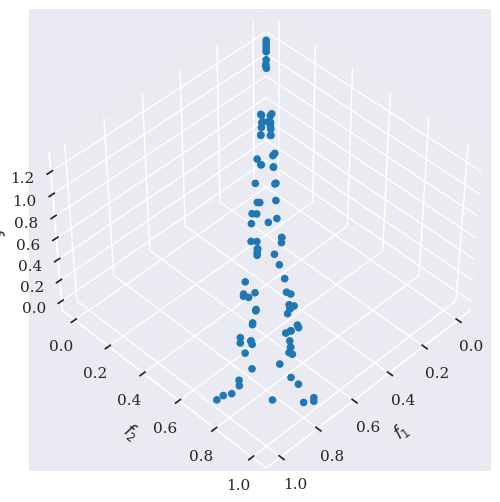

In [37]:
model_list = []
problem = DTLZ6(n_var =7)
algorithm = NSGA2(pop_size=100)
np.random.seed(14)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     69 |  7.1847608404 |  9.0460256193 |  0.000000E+00 |  7.2675358237 |  6.7868072541
     2 |      200 |     82 |  6.9998694290 |  9.0869046249 |  0.000000E+00 |  7.1899302340 |  6.6632466655
     3 |      300 |    100 |  6.9695279721 |  9.2489597700 |  0.000000E+00 |  7.1717595545 |  6.6551897357
     4 |      400 |    100 |  6.9695279721 |  9.1274333503 |  0.000000E+00 |  7.1058114817 |  6.6189212096
     5 |      500 |    100 |  7.0449845960 |  8.9620337876 |  0.000000E+00 |  7.0174106424 |  6.3364463983
     6 |      600 |    100 |  7.0216580726 |  8.7974044657 |  0.000000E+00 |  6.9144083635 |  6.0134922514
     7 |      700 |    100 |  6.9942862076 |  8.7250020712 |  0.000000E+00 |  6.8167611237 |  5.9652075757
     8 |      800 |    100 |  6.8107617833 |  8.6759167567 |  0.000000E+00 |  6.7575677135 |  5.9518005052
     9 |      900 |    100 |  6.79024

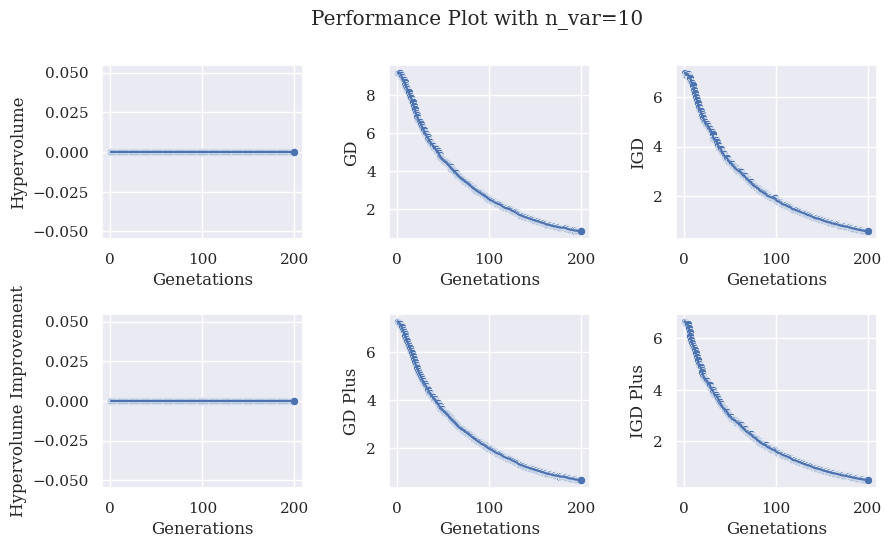

Max values of Hypervolume is 0.0 
 , Best value of GD is 0.8201591939169297 
 , Best value of IGD is 
 0.5764786253564351 Best value of GD+ is 0.641212754770316 , Best value of IGD+ is 0.4876355868515893


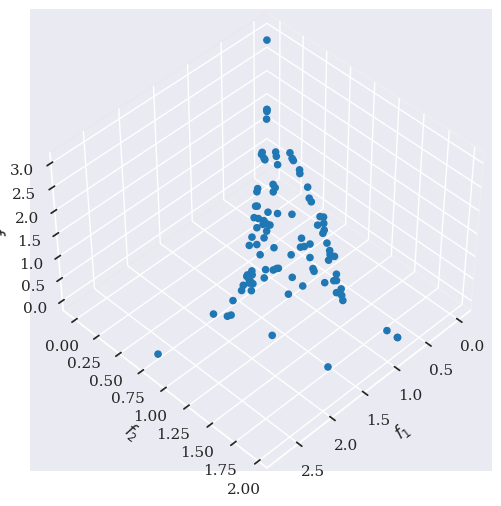

In [38]:
model_list = []
problem = DTLZ6(n_var =10)
algorithm = NSGA2(pop_size=100)
np.random.seed(15)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

In [39]:
from pymoo.util.ref_dirs import get_reference_directions
ref_dirs = get_reference_directions('energy',3,200,seed=1)

#### MOEAD with nvar5

In [40]:
from pymoo.algorithms.moo.moead import MOEAD

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     84 |  2.5758913834 |  3.4436396732 |  0.000000E+00 |  2.6850225858 |  2.2815611868
     2 |      400 |    134 |  2.8520678403 |  3.2456248796 |  0.000000E+00 |  2.5214126970 |  2.3490109904
     3 |      600 |    135 |  2.6851077101 |  3.1450730683 |  0.000000E+00 |  2.4415149802 |  2.2058948613
     4 |      800 |    140 |  2.3804885384 |  2.9219953067 |  0.000000E+00 |  2.2993653831 |  1.8624418610
     5 |     1000 |    124 |  2.2808930082 |  2.6843532323 |  0.000000E+00 |  2.1364342720 |  1.8061866618
     6 |     1200 |    112 |  1.9681749865 |  2.4830355610 |  0.000000E+00 |  1.9896859957 |  1.6939342042
     7 |     1400 |    120 |  1.7746434492 |  2.3050919631 |  0.000000E+00 |  1.8108751333 |  1.4544918149
     8 |     1600 |    119 |  1.5770812051 |  2.1466130895 |  0.000000E+00 |  1.6628348931 |  1.3086160337
     9 |     1800 |    133 |  1.33927

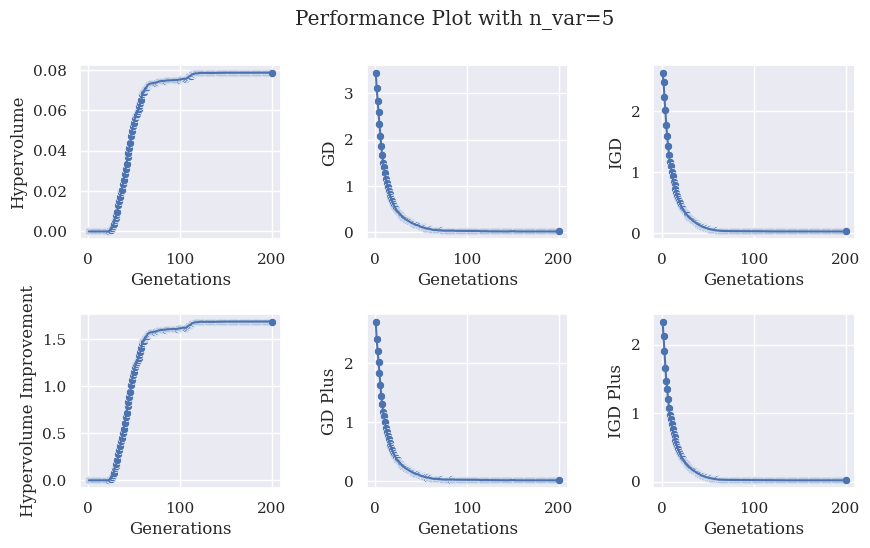

Max values of Hypervolume is 0.07866598867982091 
 , Best value of GD is 0.019844563618317566 
 , Best value of IGD is 
 0.025841529328125678 Best value of GD+ is 0.015150432126670119 , Best value of IGD+ is 0.01757223379180478


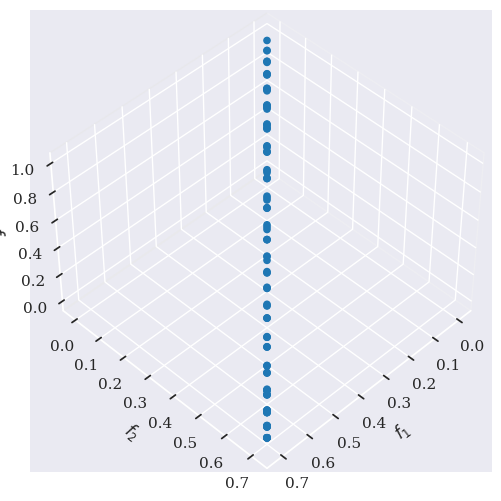

In [41]:
model_list = []
problem = DTLZ6(n_var =5)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(16)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### MOEAD with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |    107 |  4.3668034848 |  5.8503687454 |  0.000000E+00 |  4.5356134490 |  4.0558529834
     2 |      400 |    111 |  4.4265960260 |  4.9889210931 |  0.000000E+00 |  4.0132927033 |  3.7183573554
     3 |      600 |    160 |  4.3355538780 |  4.8698536025 |  0.000000E+00 |  3.8268302531 |  3.5807967992
     4 |      800 |    152 |  4.0518377704 |  4.7352177450 |  0.000000E+00 |  3.7256216503 |  3.3159460388
     5 |     1000 |    141 |  3.8282782824 |  4.4214431947 |  0.000000E+00 |  3.5067916537 |  3.0785213875
     6 |     1200 |    129 |  3.5135856876 |  4.2366614468 |  0.000000E+00 |  3.3397432091 |  3.0066483460
     7 |     1400 |    118 |  3.3052948715 |  4.0888638289 |  0.000000E+00 |  3.2140182339 |  2.6438970610
     8 |     1600 |    124 |  3.2068570223 |  3.8551066201 |  0.000000E+00 |  3.0473632772 |  2.5897151602
     9 |     1800 |    123 |  3.10449

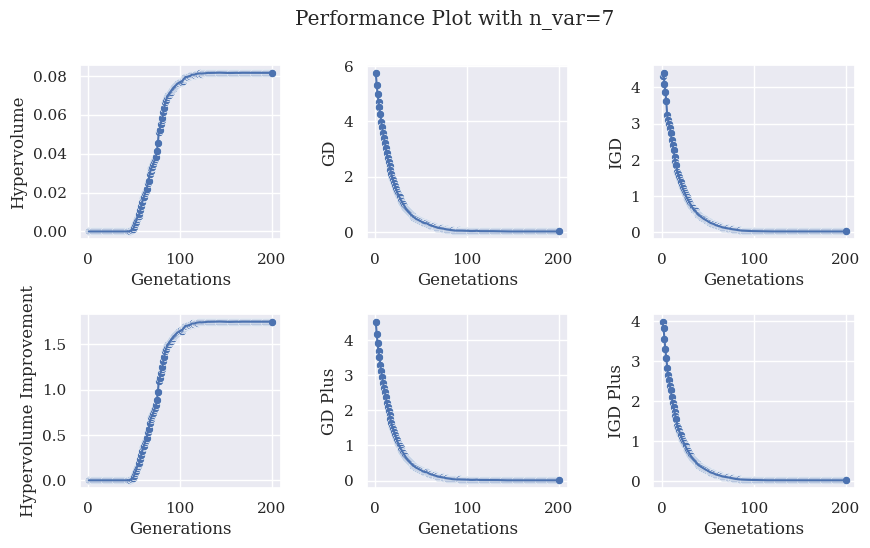

Max values of Hypervolume is 0.08160051234579106 
 , Best value of GD is 0.015525834746108216 
 , Best value of IGD is 
 0.023012097911183714 Best value of GD+ is 0.011367311219425014 , Best value of IGD+ is 0.014341989477267194


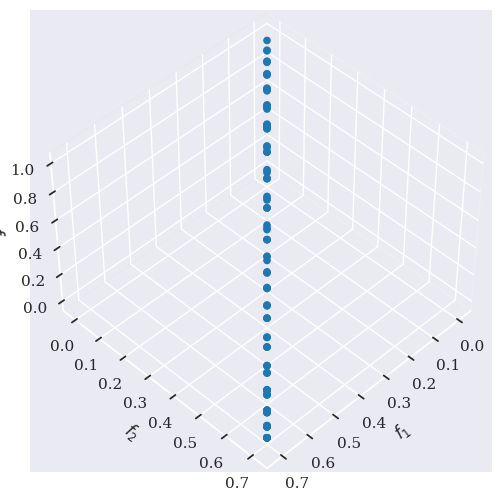

In [42]:
model_list = []
problem = DTLZ6(n_var =7)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(17)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### MOEAD with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |    119 |  7.1981651044 |  9.0156444940 |  0.000000E+00 |  7.2279516597 |  6.6859885382
     2 |      400 |    139 |  6.1541222528 |  8.6364595702 |  0.000000E+00 |  6.6065646321 |  5.9011088596
     3 |      600 |    127 |  5.7817113857 |  7.7556516775 |  0.000000E+00 |  6.0083303949 |  5.3964530185
     4 |      800 |    150 |  5.5649410094 |  7.2787960155 |  0.000000E+00 |  5.7048691128 |  5.2352043934
     5 |     1000 |    129 |  5.4591450310 |  6.8896406444 |  0.000000E+00 |  5.3988412812 |  5.0080646261
     6 |     1200 |    125 |  5.3320566437 |  6.5749143037 |  0.000000E+00 |  5.1822047597 |  4.7994794371
     7 |     1400 |    111 |  5.1554408163 |  6.3622089428 |  0.000000E+00 |  5.0521873606 |  4.6559138979
     8 |     1600 |    137 |  4.9180769109 |  6.2146939555 |  0.000000E+00 |  4.8618001871 |  4.4463668274
     9 |     1800 |    134 |  4.89921

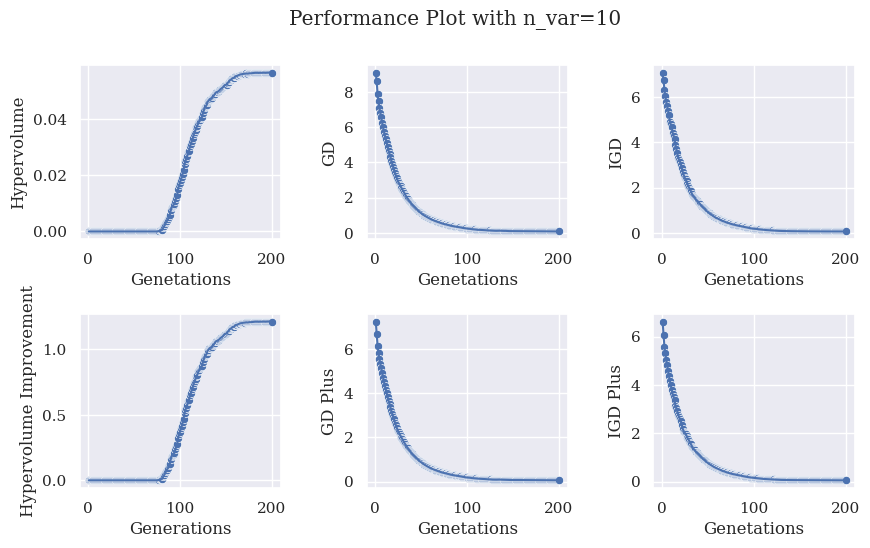

Max values of Hypervolume is 0.05653917900388471 
 , Best value of GD is 0.07679714968587091 
 , Best value of IGD is 
 0.069515180732351 Best value of GD+ is 0.06113263186230957 , Best value of IGD+ is 0.05648709864129042


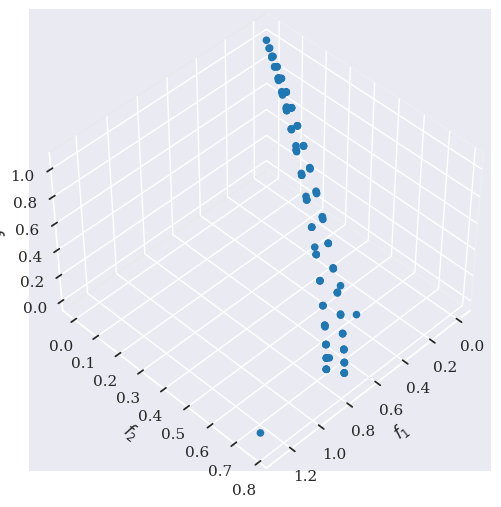

In [43]:
model_list = []
problem = DTLZ6(n_var =10)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(18)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     53 |  2.6348298271 |  3.5502883572 |  0.000000E+00 |  2.7202177819 |  2.3947320992
     2 |      400 |     55 |  2.6918886191 |  3.5146508102 |  0.000000E+00 |  2.6922909613 |  2.3147630769
     3 |      600 |     55 |  2.2094984708 |  3.4192238425 |  0.000000E+00 |  2.6073670451 |  2.0007669978
     4 |      800 |     52 |  2.2056649365 |  3.3836946821 |  0.000000E+00 |  2.5728026583 |  1.9555350122
     5 |     1000 |     47 |  2.2056649365 |  3.1042516929 |  0.000000E+00 |  2.4364257341 |  1.9555320743
     6 |     1200 |     50 |  2.2053111474 |  3.1063220346 |  0.000000E+00 |  2.3596192699 |  1.9506375057
     7 |     1400 |     45 |  2.1136501797 |  3.0025390475 |  0.000000E+00 |  2.2865606327 |  1.7756961026
     8 |     1600 |     52 |  2.2000646413 |  2.9679247478 |  0.000000E+00 |  2.2350198415 |  1.9377908946
     9 |     1800 |     60 |  2.10381

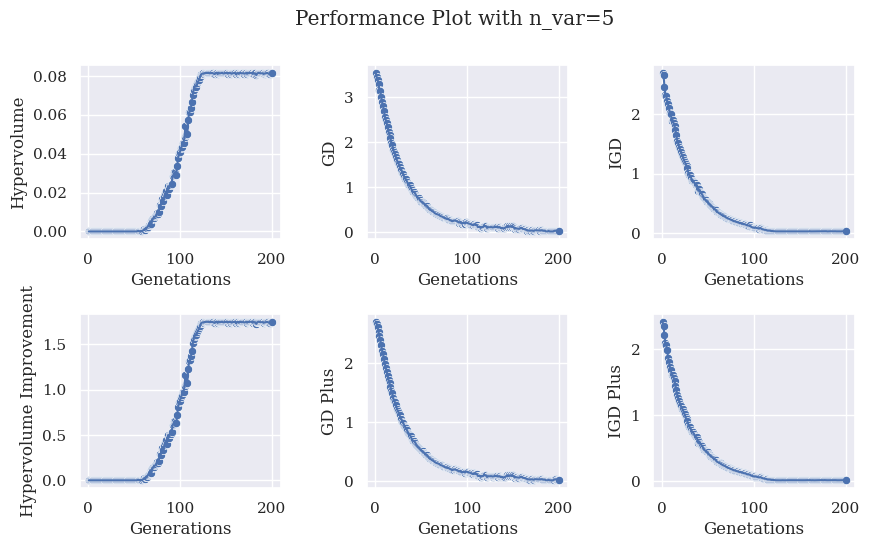

Max values of Hypervolume is 0.08161893991875775 
 , Best value of GD is 0.018442557338186782 
 , Best value of IGD is 
 0.02997731704364311 Best value of GD+ is 0.013335752397229584 , Best value of IGD+ is 0.01274839162989926


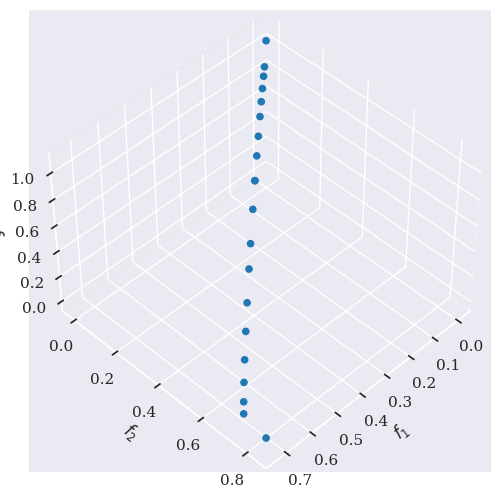

In [44]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ6(n_var =5)
np.random.seed(19)
algorithm = NSGA3(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     54 |  4.5407819367 |  6.0229085065 |  0.000000E+00 |  4.5825024144 |  4.1800016737
     2 |      400 |     57 |  4.5041526382 |  5.8913222780 |  0.000000E+00 |  4.4996562675 |  4.0149437832
     3 |      600 |     67 |  4.0676123674 |  5.6822076697 |  0.000000E+00 |  4.4274074004 |  3.8918238554
     4 |      800 |     66 |  4.0988464808 |  5.6032801795 |  0.000000E+00 |  4.3439982568 |  3.7909017163
     5 |     1000 |     54 |  4.2629641246 |  5.4925623404 |  0.000000E+00 |  4.2717300552 |  3.7954302908
     6 |     1200 |     66 |  3.8908333570 |  5.3226480226 |  0.000000E+00 |  4.1487691209 |  3.5395259222
     7 |     1400 |     49 |  3.8869689994 |  5.2747210994 |  0.000000E+00 |  4.0606979830 |  3.4606366981
     8 |     1600 |     53 |  3.7714550544 |  5.0498500559 |  0.000000E+00 |  3.9261718147 |  3.3990320362
     9 |     1800 |     53 |  3.57842

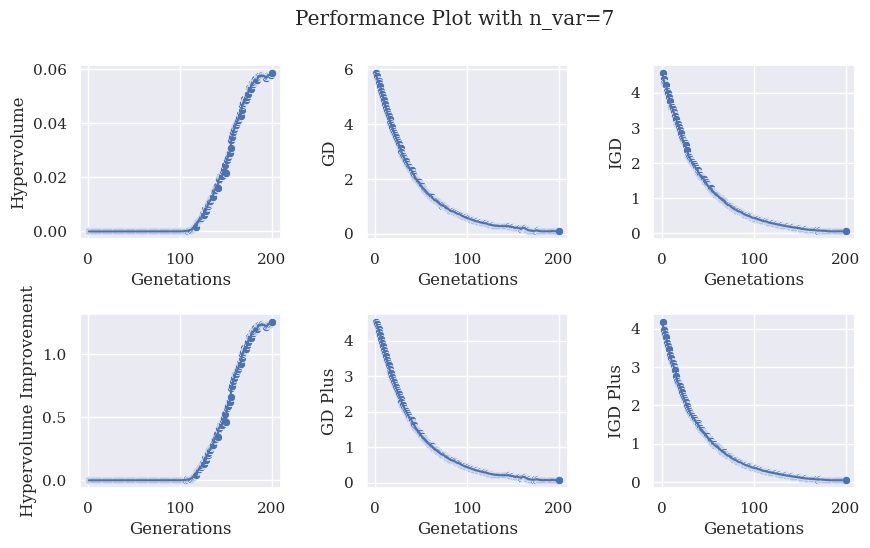

Max values of Hypervolume is 0.05860952219879513 
 , Best value of GD is 0.08192400145151485 
 , Best value of IGD is 
 0.055936593612162945 Best value of GD+ is 0.06615529174457345 , Best value of IGD+ is 0.04122848452205801


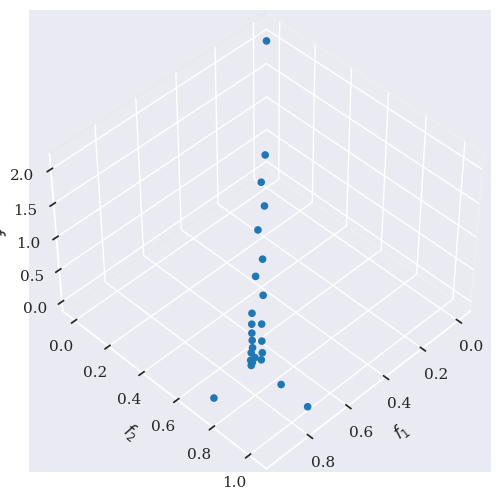

In [45]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ6(n_var =7)
algorithm = NSGA3(ref_dirs = ref_dirs)
np.random.seed(20)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     75 |  7.1888323806 |  9.2634971167 |  0.000000E+00 |  7.2725989665 |  6.7540458500
     2 |      400 |     71 |  7.2209041489 |  9.0664659015 |  0.000000E+00 |  7.1921319570 |  6.4556209300
     3 |      600 |     86 |  7.0972776036 |  9.0502528469 |  0.000000E+00 |  7.1098025390 |  6.3647816903
     4 |      800 |    108 |  7.0972776036 |  9.0052440186 |  0.000000E+00 |  7.0084889634 |  6.3695391787
     5 |     1000 |     74 |  6.9280649193 |  8.8666666254 |  0.000000E+00 |  6.8855508458 |  6.1787995277
     6 |     1200 |     76 |  6.6443718001 |  8.7207809618 |  0.000000E+00 |  6.7056763194 |  6.1385979804
     7 |     1400 |     69 |  6.6009831366 |  8.5689714413 |  0.000000E+00 |  6.5970104317 |  6.1341328495
     8 |     1600 |     71 |  6.5927375992 |  8.4018691763 |  0.000000E+00 |  6.4369898136 |  5.9939997531
     9 |     1800 |     78 |  6.67607

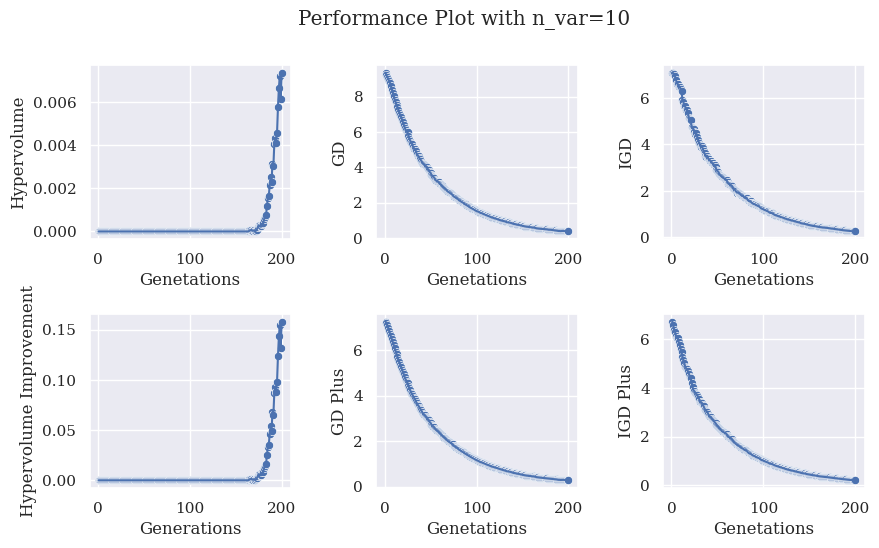

Max values of Hypervolume is 0.007365887347066638 
 , Best value of GD is 0.3627876490339081 
 , Best value of IGD is 
 0.2566553428605879 Best value of GD+ is 0.276232714133216 , Best value of IGD+ is 0.2097271308346697


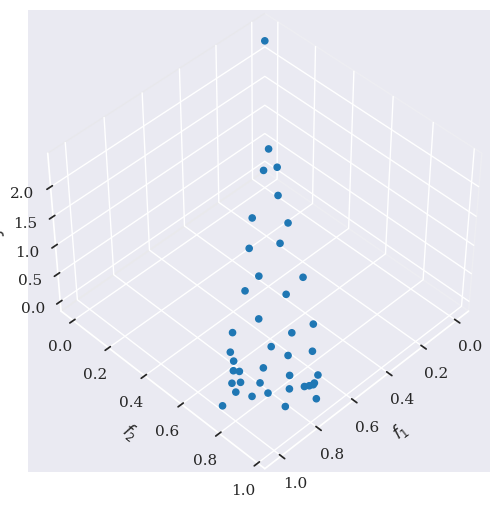

In [46]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ6(n_var =10)
algorithm = NSGA3(ref_dirs = ref_dirs)
np.random.seed(21)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ6(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()